<a href="https://colab.research.google.com/github/uttarabahad/CatOrDog-Recognization/blob/main/CatOrDog_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:** To recognize if the input image is of a cat or dog using CNN(Convolutional Neural Network)

**Step 1: Importing Dataset**

In [1]:
#Ignoring warnings if present
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Upload the data set on the google drive in .zip format
#Unzip our data set after mounting google drive using the linix command i.e "!unzip"

!unzip "/content/drive/MyDrive/CatVsDog.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CatVsDog/train/dog/dog.5499.jpg  
  inflating: CatVsDog/train/dog/dog.55.jpg  
  inflating: CatVsDog/train/dog/dog.550.jpg  
  inflating: CatVsDog/train/dog/dog.5500.jpg  
  inflating: CatVsDog/train/dog/dog.5501.jpg  
  inflating: CatVsDog/train/dog/dog.5502.jpg  
  inflating: CatVsDog/train/dog/dog.5503.jpg  
  inflating: CatVsDog/train/dog/dog.5504.jpg  
  inflating: CatVsDog/train/dog/dog.5505.jpg  
  inflating: CatVsDog/train/dog/dog.5506.jpg  
  inflating: CatVsDog/train/dog/dog.5507.jpg  
  inflating: CatVsDog/train/dog/dog.5508.jpg  
  inflating: CatVsDog/train/dog/dog.5509.jpg  
  inflating: CatVsDog/train/dog/dog.551.jpg  
  inflating: CatVsDog/train/dog/dog.5510.jpg  
  inflating: CatVsDog/train/dog/dog.5511.jpg  
  inflating: CatVsDog/train/dog/dog.5512.jpg  
  inflating: CatVsDog/train/dog/dog.5513.jpg  
  inflating: CatVsDog/train/dog/dog.5514.jpg  
  inflating: CatVsDog/train/dog/dog.5515.jpg  
  inflating: 

In [3]:
# importing

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from skimage.io import imread, imshow
import shutil

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPool2D
from keras.preprocessing.image import load_img, img_to_array

**STEP 2:Visualizing the Data and Preprocessing on Data**

In [4]:
#Visualizing images are there in our data set.Important for pre processing. 
TRAIN_DIR = "/content/CatVsDog/train" 

dict = {'cat':0 , 'dog': 0}

for dir in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, dir)
  dict[dir] = len(os.listdir(path))
  print(len(os.listdir(path)))

12499
12501


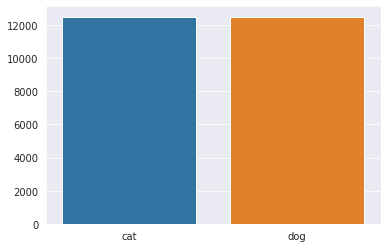

In [5]:
# Visualising classes( Cat and Dog )

sns.set_style('darkgrid')

x = ['cat', 'dog']
y = [dict['cat'] , dict['dog']]

sns.barplot(x,y)
plt.show()

In [6]:
#Function to display some images present in our dataset as an example.
def desplay_images(img_dir):
  """
  * Input  : list of image directories
  * Output : prints out the images in the list 
  """
  i = 1
  plt.figure(figsize= (10,10))
  for img in img_dir:
    plt.subplot(1,3,i)
    plt.axis(False)
    imshow(img)
    i += 1
  plt.show()

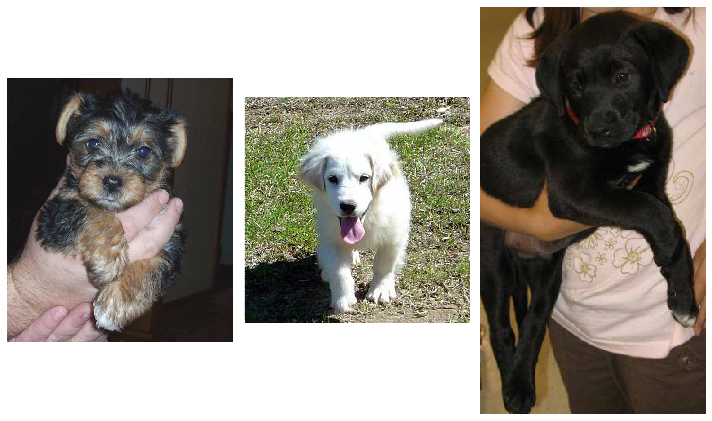

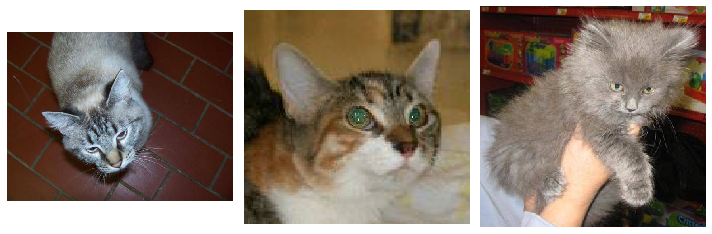

In [7]:
# Displaying 3 images from each classes(Cat and Dog)

for dir in os.listdir(TRAIN_DIR):
  ipath = os.path.join(TRAIN_DIR, dir)
  count = 0
  img_dirs = []
  for i , img in enumerate( os.listdir(ipath) ):
    img_path = os.path.join(ipath, img)
    img_dirs.append(img_path)
    if i == 2:
      break
  desplay_images(img_dir = img_dirs)

**STEP 3:** Creating Table Data_DIR that where Training folder will have 70% of data and Test folder will have 15% of data.

In [8]:
TRAIN_DIR = "/content/CatVsDog/train"

dirs = ['train', 'val' , 'test']

ROOT_DIR = "./data_dir"

if not os.path.exists(ROOT_DIR):
  for d in dirs:
    os.makedirs( os.path.join(ROOT_DIR, d) )

for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"train",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.7) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = os.path.join(de,img)
    shutil.copyfile(org, dest )
    os.remove(org)
    
for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"val",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.6) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)


for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"test",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))), replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)

In [9]:
ROOT_DIR = "/content/data_dir"

x = []
y = []
for folder in os.listdir(ROOT_DIR):
  dict = {'cat':0 , 'dog': 0}

  class_dir = os.path.join(ROOT_DIR, folder)
  
  for cls in os.listdir(class_dir):
    images = os.path.join(class_dir,cls)
    dict[cls] = len(os.listdir(images) )


    y.append(dict[cls])
    x.append(f"{folder}_{cls}")
  

**STEP 4:** Visualizing the data distributed 

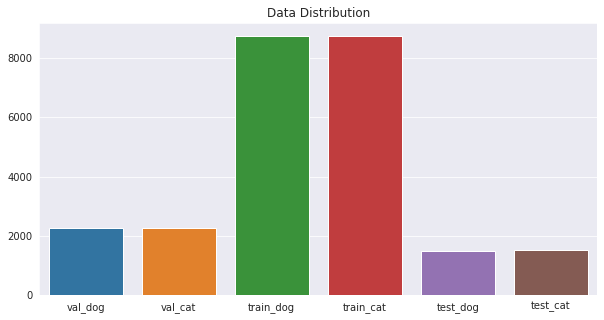

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
a = sns.barplot(x,y).set_title("Data Distribution")
plt.show()

**Step 5:** Preprocessing images using ImageDataGenerator function

In [11]:

traindatagen = ImageDataGenerator(
                                  rescale= 1./255,
                                  rotation_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip= True,
                                  )

train_data = traindatagen.flow_from_directory(directory= "/content/data_dir/train", class_mode='binary',
                                         target_size=(224,224) ) 

Found 17499 images belonging to 2 classes.


In [12]:
#0 number represents Cat class and 1 represents Dog Class 
train_data.class_indices

{'cat': 0, 'dog': 1}

In [13]:

CLASS_IDX ={ j: i for i,j in train_data.class_indices.items() }
CLASS_IDX

{0: 'cat', 1: 'dog'}

In [14]:
valdatagen = ImageDataGenerator( rescale= 1./255 )

val_data = valdatagen.flow_from_directory(directory= "/content/data_dir/val", class_mode='binary',
                                         target_size=(224,224) ) 

Found 4500 images belonging to 2 classes.


In [15]:
testdatagen = ImageDataGenerator( rescale= 1./255 )

test_data = testdatagen.flow_from_directory(directory= "/content/data_dir/test", class_mode='binary',
                                         target_size=(224,224) ) 

Found 3001 images belonging to 2 classes.


**STEP 6:** Building Model

In [16]:
model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'] )
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [17]:
model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )

In [18]:
#Early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping


es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')


mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [19]:
hist = model.fit_generator(generator=train_data , 
                           validation_data= val_data, 
                           validation_steps= 16,
                           steps_per_epoch= 32 , 
                           epochs= 30, 
                           verbose= 1, 
                           callbacks = call_back )

Epoch 1/30
32/32 [==============================] - 60s 467ms/step - loss: 1.0318 - accuracy: 0.5254 - val_loss: 0.6944 - val_accuracy: 0.4746

Epoch 00001: val_accuracy improved from -inf to 0.47461, saving model to best_model.h5
Epoch 2/30
32/32 [==============================] - 15s 455ms/step - loss: 0.6952 - accuracy: 0.4703 - val_loss: 0.6930 - val_accuracy: 0.5156

Epoch 00002: val_accuracy improved from 0.47461 to 0.51562, saving model to best_model.h5
Epoch 3/30
32/32 [==============================] - 16s 491ms/step - loss: 0.6943 - accuracy: 0.4792 - val_loss: 0.6949 - val_accuracy: 0.4961

Epoch 00003: val_accuracy did not improve from 0.51562
Epoch 4/30
32/32 [==============================] - 15s 461ms/step - loss: 0.6939 - accuracy: 0.4802 - val_loss: 0.6918 - val_accuracy: 0.4844

Epoch 00004: val_accuracy did not improve from 0.51562
Epoch 5/30
32/32 [==============================] - 14s 453ms/step - loss: 0.6877 - accuracy: 0.5401 - val_loss: 0.6838 - val_accuracy: 0

In [20]:

#Loading a Best fit model 
from keras.models import load_model

model = load_model("/content/best_model.h5")

**STEP 7:** Validating the model

In [21]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

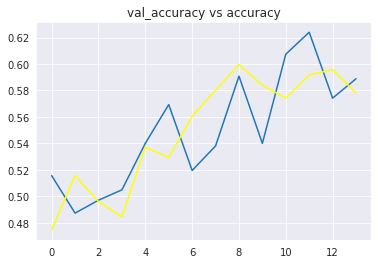

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="yellow")
plt.title("val_accuracy vs accuracy")
plt.show()

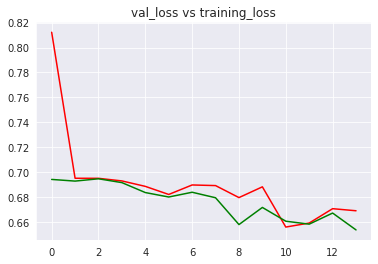

In [23]:
plt.plot(h['loss'], c = 'red')
plt.plot(h['val_loss'] ,c="green")
plt.title("val_loss vs training_loss")
plt.show()

In [24]:
#Checking accuracy of model 

acc = model.evaluate_generator(generator= test_data )[1] 

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 57.147616147994995 %


**STEP 8:**Checking model by taking a random image everytime

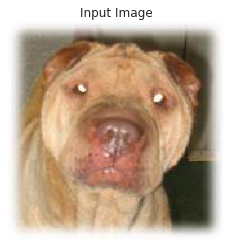

########################################################################################
(224, 224, 3) is the dimention of image before expansion 

(1, 224, 224, 3) is the dimention of image after expansion 
########################################################################################
 The model predicts the image is a dog 


In [30]:
TEST_DIR = "/content/CatVsDog/test1"
img = np.random.choice(os.listdir(TEST_DIR), 1 )[0]
image = img_to_array(load_img( os.path.join( TEST_DIR, img), target_size=(224,224) ))/255

plt.imshow(image)
plt.title("Input Image")
plt.axis(False)
plt.show()

print("########################################################################################")

print( f"{image.shape} is the dimention of image before expansion ")
#expanding the dimension so that it can be fit inside the model
image = np.expand_dims( image, axis= 0) 
print()
print( f"{image.shape} is the dimention of image after expansion ")

print("########################################################################################")

# Now lets see what our model predicts for our image 

pred = model.predict_classes(image)
print( f" The model predicts the image is a {CLASS_IDX[pred[0][0] ]} ")